In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm
import matplotlib.colors

sys.path.append("..")

In [2]:
from manage_data import get_conditions, load_result, delete_all, delete_result

In [3]:
# delete_all()

In [4]:
velocity = 0.5
ensemble = 10000

df = load_result(conditions=get_conditions(
    N_particle = 1,
    N_ensemble = ensemble,
    velocity = velocity,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = None,
    )
)

df

UndefinedVariableError: name 'N_particle' is not defined

In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['4be21d', '199d7e', 'd8a676', 'e91624', '1c9f93', '5946f1', '40c8fb', '745e1d', '5d2f9a', 'c14f5d', 'f0a5f0', 'e2d334', '119172', 'c1050b', 'fddfda', 'c4d7d0', '7b03a9', '5addde', '0ab0c0', '6aee69', '2503a1', 'ee3986', '2d5c1b', '4e8284', '1782d5', 'd8937e', '615f97', '04ac1e', 'de0cf4', 'cfa2b4', 'bfc6ea', '7d1ae2', 'd79807', '9fde36', '488106', '753002', 'be39b7', '6f5387', 'a911c6', '10f133', 'cc3a6a', 'bb8a97', 'c1f803', 'e07be5', '8bd979', 'b4d53d', 'a5136c', 'e6d962', 'e48fc2', '569c0b', 'ca59ce', 'b869d0', 'e4faf7', '3d198a', '8af23a', 'e852d2', '94ca8a', '3c1334', '6a2d5f', 'e36da5', '7d25cd', '6ceed6', 'b56cf3', '873265', '73b6fb', '2e4a4c', '9e07dc', '095559', '901433', 'd83111', '014ad9', '131eb2', 'af34ff', 'def935', 'b9e9d0', 'd18d1a', 'ce1b1b', '71daee', '1fed49', 'fe65bd', 'ac3257', '490846', '030582', '98df49', 'bfb274', 'e085a2', '439d73', '1795fd', '7725b6', '95a7d1', 'ad708c', '6f8bf3', '0eb4a2', '953504', '8241a1', '85dede', '15fb6c', 'c69b65', '990353', '3eef76',

In [17]:
x, y = sorted(set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy()))
print(f"data = {len(x)} x {len(y)}")
print(x)
print(y)

data = 500 x 100
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.27999999999999997, 0.29, 0.3, 0.31, 0.32, 0.32999999999999996, 0.33999999999999997, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42000000000000004, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.6799999999999999, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.9299999999999999, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.3

In [7]:
drag, std, sample_size = (
    np.zeros((len(x), len(y))), np.zeros((len(x), len(y))), np.zeros((len(x), len(y))))

for i, slope in enumerate(x):
    for j, Lambda in enumerate(y):
        conditions = get_conditions(slope=slope, Lambda=Lambda)
        filtered_df = df.query(" and ".join(conditions))
        
        drags, N_drags = filtered_df["drag"].to_numpy(), filtered_df["N_ensemble"].to_numpy()
        
        if len(drags) == 0: continue
        else:
            drag[i,j] = np.mean(drags[0])/(filtered_df["Lambda"].to_numpy()[0]/filtered_df["boundary"].to_numpy()[0])
            std[i,j] = np.std(drags[0])/(filtered_df["Lambda"].to_numpy()[0]/filtered_df["boundary"].to_numpy()[0])
            sample_size[i,j] = N_drags[0]

# mask = (sample_size == 0)
# print(mask.astype(np.int64).sum())

print(drag.max(), drag.min())

drag = drag.transpose()
std = std.transpose()
sample_size = sample_size.transpose()

0.006237830000000012 -0.0025849999999999996


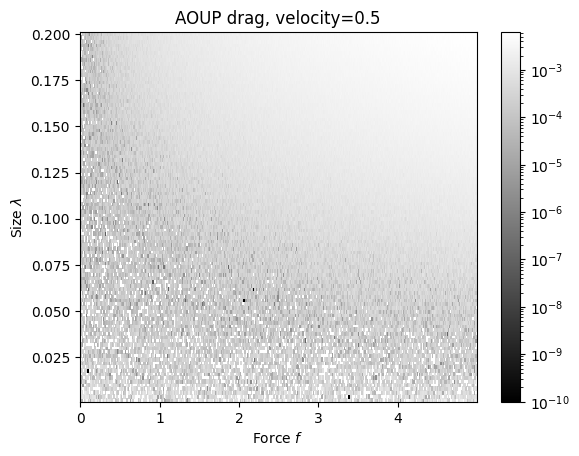

In [8]:
fig, ax = plt.subplots()

c = ax.pcolor(x, y, drag, shading="auto",
               norm=LogNorm(vmin=1.e-10, vmax=drag.max()), cmap="binary_r")
# c = ax.pcolor(x, y, average, shading="auto",
#                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

fig.colorbar(c, ax=ax)

ax.set_title(f"AOUP drag, velocity={velocity}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

plt.show()

In [9]:
pm_flag = drag/np.abs(drag)
data = np.log10(np.abs(drag))
upper_boundary = data[pm_flag == 1.0].min()
data[pm_flag == 1.0] -= upper_boundary
lower_boundary = data[pm_flag == -1.0].min()
data[pm_flag == -1.0] -= lower_boundary
data *= pm_flag
data[np.isnan(data)] = 0.0

print(upper_boundary, lower_boundary)
print(f"max={data.max()+upper_boundary} min={data.min()-lower_boundary}")

-19.362829735502853 -20.20792777551711
max=-2.204966465274282 min=2.587539452570038


/tmp/ipykernel_1427893/1800197575.py:1: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/tmp/ipykernel_1427893/1800197575.py:2: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


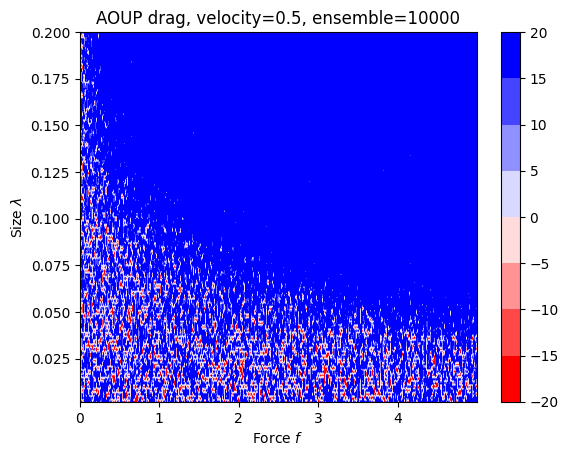

In [11]:
fig, ax = plt.subplots()

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

plt.contourf(x, y, data, cmap=cmap, norm=norm)
# fig.colorbar(c, ax=ax)
cbar = plt.colorbar()
# ctks = [lower_boundary-1, lower_boundary-0, lower_boundary-(-1), lower_boundary-(-2), 0, -2-upper_boundary, -1-upper_boundary, 0-upper_boundary, 1-upper_boundary, 2-upper_boundary]
# ctkls = ["$-10^{%d}$"%(np.round(-v+lower_boundary,0)) for v in ctks[:4]] + ["0"] + ["$10^{%d}$"%(np.round(v+upper_boundary,5)) for v in ctks[5:]]
# cbar.set_ticks(ctks)
# cbar.set_ticklabels(ctkls)

ax.set_title(f"AOUP drag, velocity={velocity}, ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1427893/3742645626.py:3: RuntimeWarning: invalid value encountered in divide
  Z = (drag - 0) / (std / np.sqrt(sample_size))


[[0.80894208 0.38815062 0.50795271 ... 0.82175497 0.29936185 0.95532561]
 [0.62789723 0.83584536 0.11083654 ... 0.72479333 0.81404046 0.8972439 ]
 [0.54132226 0.96707011 0.05613001 ... 0.51370948 0.29383936 0.0546925 ]
 ...
 [0.63306216 0.15126161 0.96231694 ... 1.         1.         1.        ]
 [0.60211631 0.53465353 0.45509979 ... 1.         1.         1.        ]
 [0.53902541 0.11635203 0.45926468 ... 1.         1.         1.        ]]
0.00013127406111064984


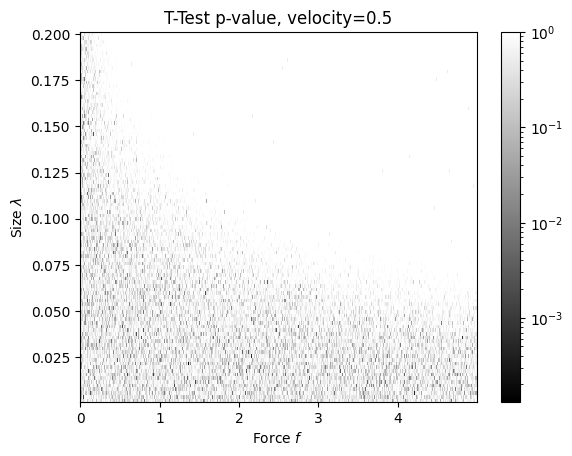

In [15]:
from scipy.stats import norm

Z = (drag - 0) / (std / np.sqrt(sample_size))
Z[np.isnan(Z)] = 0.0

p_value = norm.cdf(Z)
print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

c = ax.pcolor(x, y, p_value, shading='auto',
               norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")

fig.colorbar(c, ax=ax)

ax.set_title(f"T-Test p-value, velocity={velocity}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

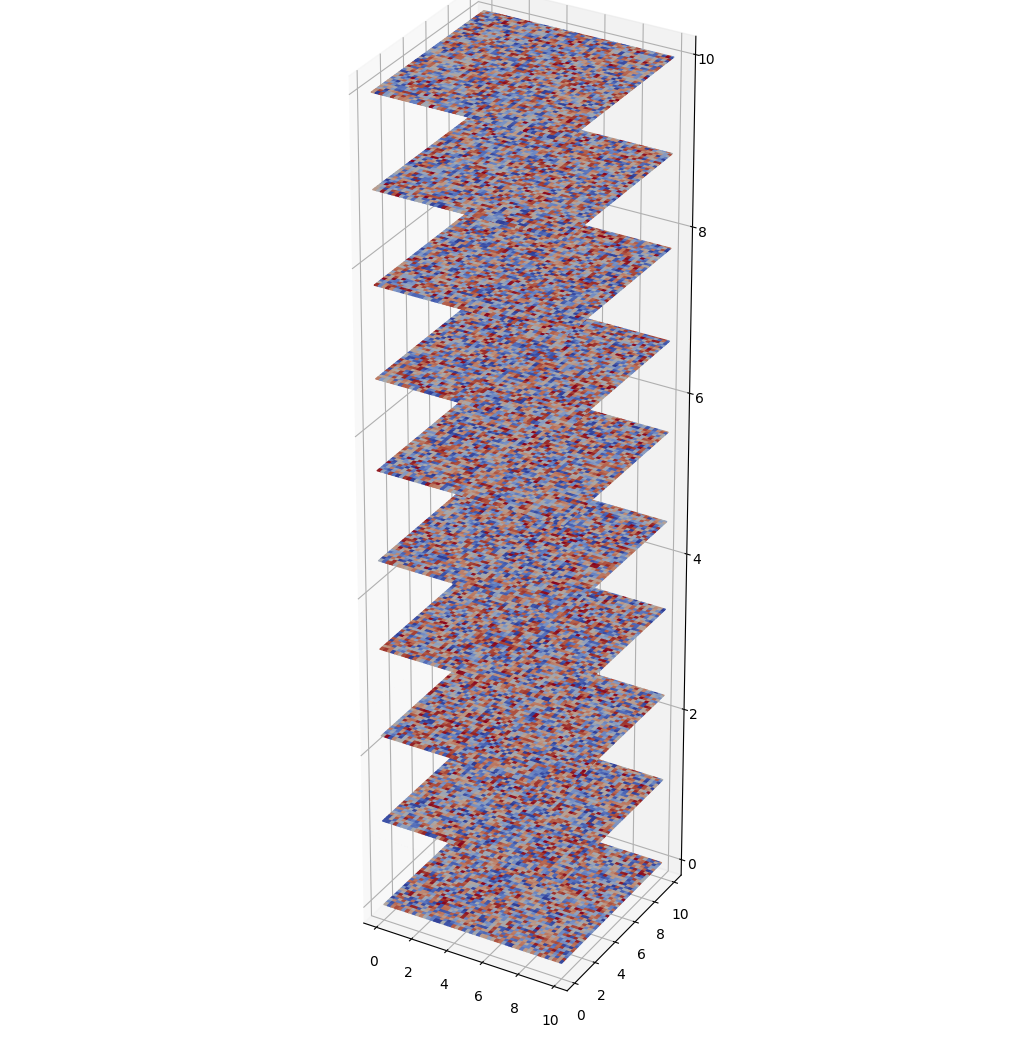

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors

X = np.linspace(0, 10, 100)
Y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(X, Y)

rng = np.random.default_rng()
energy = 2 * rng.random([100,100,10]) - 1

fig = plt.figure(figsize=(10,20))
# ax = fig.add_subplot(projection='3d')
ax = plt.axes([0, -1, 1, 2],projection='3d')
norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

for n, z in enumerate(list(np.linspace(0,10,10))):
    Z = np.zeros_like(X)+z
    ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

ax.set_box_aspect((1, 1, 4))

plt.show()